In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

In [2]:
df = pd.read_csv('heart_attack_predictions.csv')

df.head(10)

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,Germany,39,Male,210.091036,173.301650,Never,0.531933,Active,No,No,...,68.333573,165.060897,Medium,No,Urban,51.988416,Good,Tertiary,Low,Died
1,Egypt,88,Male,163.998730,137.381678,Former,5.626668,Sedentary,Yes,Yes,...,98.194015,452.124651,Medium,No,Suburban,97.739896,Good,NaN,Low,Died
2,Spain,60,Female,263.502590,139.737677,Former,0.928015,Active,No,Yes,...,118.767677,171.432620,Low,No,Urban,60.352793,Poor,Tertiary,Low,Survived
3,Canada,25,Female,292.003927,85.992807,Former,7.374519,Active,No,Yes,...,190.190597,329.553258,Medium,No,Urban,14.397347,Good,Secondary,High,Survived
4,France,54,Female,267.736563,119.882856,Former,4.317845,Sedentary,Yes,No,...,188.209372,449.953074,High,Yes,Rural,69.448684,Good,NaN,Low,Died
5,Pakistan,89,Male,192.824536,84.614988,Current,4.275495,Active,Yes,Yes,...,91.718371,476.605123,High,Yes,Suburban,23.806738,Good,Primary,Medium,Died
6,Germany,37,Female,248.192810,119.187008,Current,9.786531,Moderate,No,No,...,111.451727,471.972380,High,No,Urban,81.992726,Poor,Secondary,Medium,Died
7,Nigeria,67,Female,190.648952,88.151404,Current,0.282693,Active,Yes,Yes,...,134.535071,438.827926,Low,No,Urban,57.804529,Good,Primary,Medium,Died
8,Vietnam,36,Female,167.748324,174.399328,Never,3.382476,Active,Yes,No,...,136.219095,126.158745,Low,Yes,Suburban,20.029875,Poor,Secondary,Medium,Died
9,Canada,67,Female,170.507186,164.832277,Former,6.146588,Moderate,No,Yes,...,129.812473,376.639056,Low,Yes,Urban,95.596014,Poor,Tertiary,High,Survived


In [3]:
print("Amount of columns: ", df.shape[0])
print(df.isnull().sum())


Amount of columns:  623027
Country                         0
Age                             0
Gender                          0
Cholesterol_Level               0
Blood_Pressure                  0
Smoking_History                 0
Alcohol_Consumption             0
Physical_Activity               0
Obesity                         0
Diabetes                        0
Family_History                  0
Stress_Levels                   0
Dietary_Habits                  0
Heart_Attack_History            0
Chest_Pain                      0
Exercise_Induced_Angina         0
Resting_ECG                     0
Max_Heart_Rate_Achieved         0
Thalassemia                     0
HDL_Cholesterol                 0
LDL_Cholesterol                 0
Triglycerides                   0
Heart_Disease_Risk              0
Medication_Adherence            0
Urbanization_Level              0
Air_Pollution_Exposure          0
Access_To_Healthcare            0
Education_Level            155697
Income_Level         

In [4]:
#df = df[['Age', 'Gender', 'Cholesterol_Level', 'Blood_Pressure', 'Smoking_History', 'Obesity', 'Diabetes', 'Family_History', 'Max_Heart_Rate_Achieved', 'Thalassemia', 'Heart_Attack_History', 'Heart_Attack_Outcome']]

df.head(10)

,Country,Age,Gender,Cholesterol_Level,Blood_Pressure,Smoking_History,Alcohol_Consumption,Physical_Activity,Obesity,Diabetes,...,LDL_Cholesterol,Triglycerides,Heart_Disease_Risk,Medication_Adherence,Urbanization_Level,Air_Pollution_Exposure,Access_To_Healthcare,Education_Level,Income_Level,Heart_Attack_Outcome
0,Germany,39,Male,210.091036,173.301650,Never,0.531933,Active,No,No,...,68.333573,165.060897,Medium,No,Urban,51.988416,Good,Tertiary,Low,Died
1,Egypt,88,Male,163.998730,137.381678,Former,5.626668,Sedentary,Yes,Yes,...,98.194015,452.124651,Medium,No,Suburban,97.739896,Good,NaN,Low,Died
2,Spain,60,Female,263.502590,139.737677,Former,0.928015,Active,No,Yes,...,118.767677,171.432620,Low,No,Urban,60.352793,Poor,Tertiary,Low,Survived
3,Canada,25,Female,292.003927,85.992807,Former,7.374519,Active,No,Yes,...,190.190597,329.553258,Medium,No,Urban,14.397347,Good,Secondary,High,Survived
4,France,54,Female,267.736563,119.882856,Former,4.317845,Sedentary,Yes,No,...,188.209372,449.953074,High,Yes,Rural,69.448684,Good,NaN,Low,Died
5,Pakistan,89,Male,192.824536,84.614988,Current,4.275495,Active,Yes,Yes,...,91.718371,476.605123,High,Yes,Suburban,23.806738,Good,Primary,Medium,Died
6,Germany,37,Female,248.192810,119.187008,Current,9.786531,Moderate,No,No,...,111.451727,471.972380,High,No,Urban,81.992726,Poor,Secondary,Medium,Died
7,Nigeria,67,Female,190.648952,88.151404,Current,0.282693,Active,Yes,Yes,...,134.535071,438.827926,Low,No,Urban,57.804529,Good,Primary,Medium,Died
8,Vietnam,36,Female,167.748324,174.399328,Never,3.382476,Active,Yes,No,...,136.219095,126.158745,Low,Yes,Suburban,20.029875,Poor,Secondary,Medium,Died
9,Canada,67,Female,170.507186,164.832277,Former,6.146588,Moderate,No,Yes,...,129.812473,376.639056,Low,Yes,Urban,95.596014,Poor,Tertiary,High,Survived


In [5]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [6]:
# Define target variable
X = df.drop(columns=['Heart_Attack_Outcome'])
y = df['Heart_Attack_Outcome']

In [7]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
mi_series.plot(kind='bar')
plt.title("Mutual Information Scores")
plt.show()


KeyboardInterrupt: 

In [ ]:
top_features = [
    'Family_History', 'Exercise_Induced_Angina', 'Heart_Attack_History', 
    'Chest_Pain', 'Gender', 'Medication_Adherence', 'Resting_ECG', 
    'Obesity', 'Diabetes'
]

X = X[top_features]

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit only on train data
X_test = scaler.transform(X_test)  # Use the same transformation on test data


In [ ]:
# Train k-NN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan')

In [ ]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


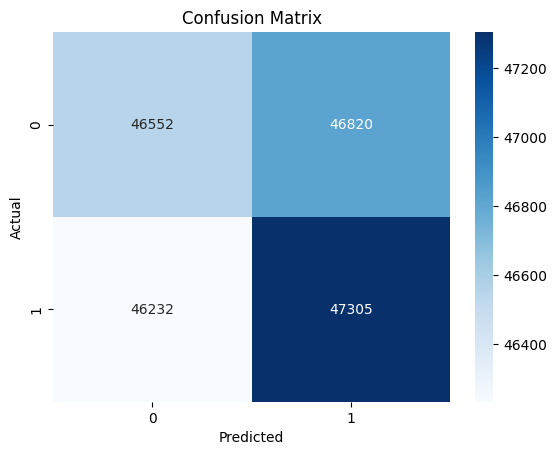

In [ ]:

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.502153454354793
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     93372
           1       0.50      0.51      0.50     93537

    accuracy                           0.50    186909
   macro avg       0.50      0.50      0.50    186909
weighted avg       0.50      0.50      0.50    186909

